# 3D Laplace Equation

## Laplace Equation
Laplace Equation은 비압축성, 비회전류 유동에서 정상상태일 때 Velocity Potential 또는 Streamfunction의 해이다.

$$
\nabla^2 u = 0.
$$

간단한 예제로 Heat Conduction에 의해 Steady State에 도달하는 경우를 생각하자

예를 들면, 윗면에 온도만 300도이고 나머지 면의 온도가 100도인 경우 최종적으로 2차원 공간 내 온도 분포는 Laplace Equation으로 구할 수 있다.

$[0,1]^3$ 공간에 대해 수식으로 표현하면 다음과 같다.

$$
-k (T_{xx} + T_{yy} + T_{zz}) = 0\\
T(x, 1, z) = 300, T(x, 0, z) = 100, 상하\\
T(x, y, 0) = T(x, y, 1) = 100, 좌우\\
T(0, y, z) = T(1, y, z) = 100, 전후\\
$$

편의상 $k=1$ 로 생각한다.

### Finite Difference Method
계산 영역을 x, y, z 각 방향별로 균일하게 나누어서 생각하자.

이 경우 3차원 Array는 각 격자점의 해와 부합한다.

각 방향별 편미분을 2차 정확도 Central Difference로 표현하면 다음과 같다.

$$
\frac {T_{i+1,j,k} -2 T_{i,j,k} +  T_{i-1,j,k}}{\Delta x^2}
+
\frac {T_{i,j+1,k}^n -2 T_{i,j,k}^n +  T_{i,j-1,k}^n}{\Delta y^2}
+
\frac {T_{i,j,k+1}^n -2 T_{i,j,k}^n +  T_{i,j,k-1}^n}{\Delta z^2}
=0
$$

$\Delta x = \Delta y = \Delta z = h$ 인 경우 다음과 같이 정리된다.

$$
T_{i+1,j,k} + T_{i,j+1,k} + T_{i, j, k+1} - 6 T_{i,j,k} + T_{i,j-1,k} + T_{i-1,j,k} + T_{i,j,k-1}
=0
$$

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np
import math
from numpy import linalg

import subprocess
import time

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Iterative Methods

### 개념
매우 큰 행렬 System $Ax=b$ 를 반복해서 푸는 방법이다.

기본 개념은 다음과 같다.
- $A = A_1 - A_2$
   - $A_1$ 은 역행렬을 쉽게 구해지는 형태이다.
   
$$
A_1 x = A_2 x + b
$$
   
- 반복되는 해를 $x^{(k)}$ 하고 이를 적용한다.

$$
A_1 x^{(k+1)} = A_2 x^{(k)}+ b
$$

- $x^{(k)} \rightarrow x$ 이면 오차 $e^{(k)} = x^{(k+1)} - x^{(k)} \rightarrow 0$ 이다. 즉 오차가 $e^{(k)}$ 감소할 때 까지 반복한다.

   - 모든 경우에 오차가 감소하지 않는다. $A_1^{-1} A_2$ 의 Eigenvalue가 모두 1 보다 작아야 한다.
   
   
### Point Jacobi Method
이 방법은 $A_1 = D$ 로 한 경우이다.

Laplace 문제에 적용하면 다음과 같이 표현할 수 있다.

$$
T_{i, j, k}^{(n+1)} = \frac{1}{6} \left (
T_{i+1,j,k}^{(n)} + T_{i,j+1,k}^{(n)}+ T_{i,j,k+1}^{(n)} + T_{i,j-1,k}^{(n)} + T_{i-1,j,k}^{(n)} + T_{i,j,k-1}^{(n)}
\right )
$$

In [32]:
subprocess.run(["python", "3D_serial.py"])
ti_serial = np.load("ti_serial.npy")
time_serial = np.load("time_serial.npy")

In [45]:
subprocess.run(["python", "3D_numba.py"])
ti_numba = np.load("ti_numba.npy")
time_numba = np.load("time_numba.npy")

In [50]:
#subprocess.run(["python", "3D_pycuda.py"])
ti_pycuda = np.load("ti_pycuda.npy")
time_pycuda = np.load("time_pycuda.npy")

In [ ]:
if linalg.norm(ti_numba-ti_serial) < 1e-4 :
    print("Solution Converged")

Solution Converged


In [57]:
if linalg.norm(ti_pycuda-ti_serial) < 1e-4 :
    print("Solution Converged")
else:
    print(linalg.norm(ti_pycuda-ti_serial))

2.3206289462737644


이거 왜 수렴 안하지? 평균적으로 격자 당 0.004정도의 오차를 보이는거긴한데..

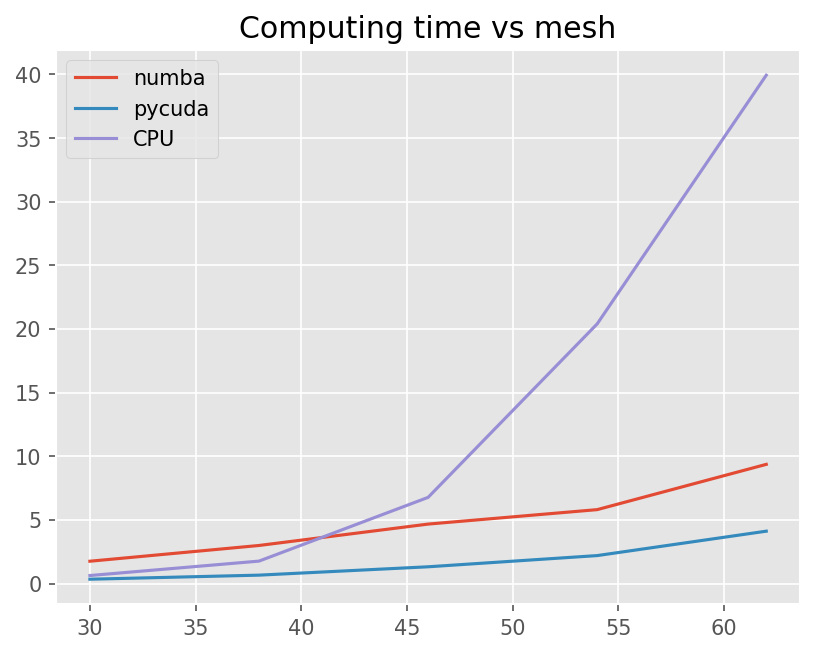

In [53]:
ns = np.arange(30,63,8)
plt.title("Computing time vs mesh")
plt.plot(ns, time_numba, label = "numba")
plt.plot(ns, time_pycuda, label = "pycuda")
plt.plot(ns, time_serial, label = "CPU")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# for y in range(1, 32, 2):
#     plt.imshow(ti_serial[:, y, :])
#     plt.title(f'Slice at y={y}')
#     plt.colorbar()
#     plt.show()


# # Plot contour
# plt.imshow(ti_serial[8, 1:-1, 1:-1])
# plt.title("Laplace Solution via Serial Computing")
# plt.show()

## Speed-Up, Efficiency, T/P